In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title="Image", image=None, size=10):
    w,h=image.shape[0], image.shape[1]
    aspect_r=w/h
    plt.figure(figsize=(size*aspect_r,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


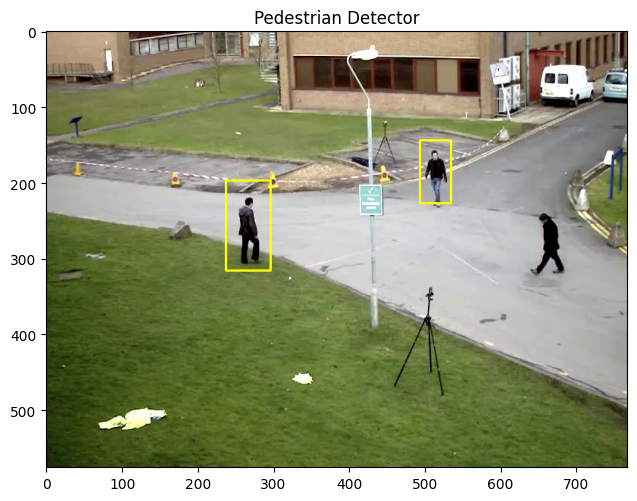

In [11]:
cap=cv2.VideoCapture('walking.mp4')
body_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')
ret, frame = cap.read()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
bodies=body_classifier.detectMultiScale(gray, 1.2, 3)

#extract bounding boxes for identified bodies : 
for (x,y,w,h) in bodies:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
      
#release video capture
cap.release()   
imshow("Pedestrian Detector", frame)

### Run the code below to save the video with detected pedestrians


In [12]:
# Create our video capturing object
cap = cv2.VideoCapture('walking.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'walking_output.avi' file.
out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

body_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Pass frame to our body classifier
    bodies = body_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Write the frame into the file 'output.avi'
    out.write(frame)
  else:
      break

cap.release()
out.release()

### Cars detection using Haarcascade classifier


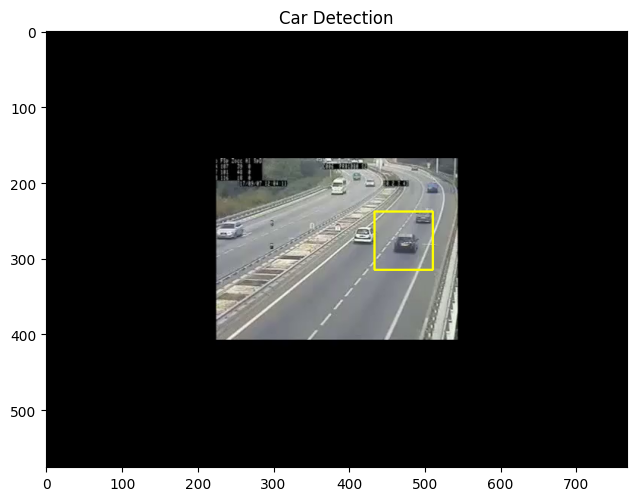

In [13]:
cap = cv2.VideoCapture('cars.mp4')
car_detector=cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')
ret, frame = cap.read()
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
vehicles=car_detector.detectMultiScale(gray, 1.4, 2)

for (x,y,w,h) in vehicles:
    cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,255), 2)

cap.release()
imshow("Car Detection", frame) #show last frame


### Applying detection to full-length video

run the code then open: 'cars_output.avi' to see full result

In [15]:
# Create our video capturing object
cap = cv2.VideoCapture('cars.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('cars_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

vehicle_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Pass frame to our body classifier
    vehicles = vehicle_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in vehicles:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Write the frame into the file 'output.avi'
    out.write(frame)
  else:
      break

cap.release()
out.release()